<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter06/Exercise_6_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Value iteration implementation of the Jack's car rental problem using the after state value function.

The code is written in C. See [car_rental_afterstate.c](https://github.com/enakai00/rl_book_solutions/blob/master/Chapter06/car_rental_afterstate.c
)

### Visualization of the result.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

In [0]:
policy = np.array(
[[ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -2, -2, -2, -3, -3, -3, -3, -3, -4, -4, -4],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -2, -2, -2, -2, -2, -3, -3, -3, -3],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -2, -2, -2, -2, -2],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -2],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1],
 [ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 3,  3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 4,  3,  3,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 4,  4,  3,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  4,  4,  3,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  4,  3,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  4,  3,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  4,  4,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  3,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  3,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  3,  3,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  4,  4,  3,  3,  2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0],
 [ 5,  5,  5,  5,  4,  4,  3,  3,  3,  3,  2,  2,  2,  2,  1,  1,  1,  0,  0,  0,  0]])

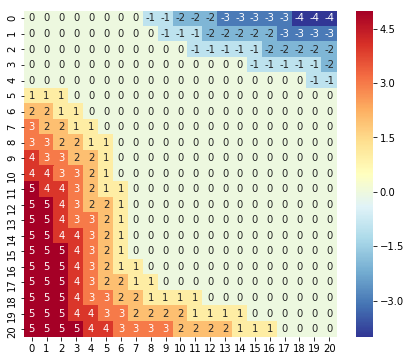

In [7]:
fig, ax = plt.subplots(figsize=(7, 6)) 
sns.heatmap(policy, cmap='RdYlBu_r', annot=True, ax=ax)

In [0]:
value = np.array(
[[421, 431, 441, 450, 459, 468, 477, 485, 492, 499, 506, 512, 519, 524, 530, 535, 541, 545, 550, 554, 558],
 [431, 441, 451, 460, 469, 478, 487, 494, 502, 509, 516, 522, 528, 534, 540, 545, 550, 555, 560, 564, 568],
 [440, 450, 460, 470, 479, 488, 496, 504, 511, 518, 525, 532, 538, 544, 549, 555, 560, 564, 569, 573, 577],
 [449, 459, 469, 478, 488, 496, 505, 513, 520, 527, 534, 540, 546, 552, 558, 563, 568, 573, 577, 581, 585],
 [457, 467, 477, 487, 496, 504, 513, 520, 528, 535, 542, 548, 554, 560, 565, 570, 575, 580, 584, 588, 592],
 [465, 475, 484, 494, 503, 512, 520, 528, 535, 542, 548, 555, 561, 566, 572, 577, 582, 586, 590, 594, 598],
 [472, 481, 491, 501, 510, 518, 526, 534, 541, 548, 555, 561, 567, 572, 577, 582, 587, 592, 596, 600, 603],
 [478, 488, 498, 507, 516, 525, 533, 540, 547, 554, 560, 566, 572, 577, 583, 587, 592, 596, 601, 604, 607],
 [484, 494, 504, 513, 522, 531, 538, 546, 553, 559, 565, 571, 577, 582, 587, 592, 596, 601, 605, 608, 611],
 [490, 500, 510, 519, 528, 536, 544, 551, 558, 564, 570, 576, 581, 586, 591, 596, 600, 605, 609, 612, 615],
 [496, 506, 515, 525, 533, 542, 549, 556, 562, 569, 574, 580, 585, 590, 595, 600, 604, 608, 612, 615, 618],
 [501, 511, 521, 530, 539, 547, 554, 561, 567, 573, 579, 584, 589, 594, 599, 603, 607, 611, 615, 618, 621],
 [506, 516, 526, 535, 544, 551, 559, 565, 571, 577, 583, 588, 593, 598, 602, 606, 611, 614, 618, 621, 624],
 [511, 521, 531, 540, 548, 556, 563, 569, 575, 581, 586, 591, 596, 601, 605, 609, 613, 617, 621, 624, 626],
 [516, 526, 536, 545, 553, 560, 567, 573, 579, 585, 590, 595, 599, 604, 608, 612, 616, 620, 623, 626, 629],
 [520, 530, 540, 549, 557, 565, 571, 577, 583, 588, 593, 598, 602, 607, 611, 615, 618, 622, 625, 628, 631],
 [524, 534, 544, 553, 561, 568, 575, 581, 586, 591, 596, 601, 605, 609, 613, 617, 620, 624, 627, 630, 632],
 [528, 538, 548, 557, 565, 572, 578, 584, 589, 594, 599, 603, 607, 611, 615, 619, 622, 626, 629, 631, 634],
 [532, 542, 551, 560, 568, 575, 581, 587, 592, 597, 601, 605, 609, 613, 617, 620, 624, 627, 630, 633, 635],
 [534, 544, 554, 563, 571, 578, 584, 589, 594, 599, 603, 607, 611, 615, 618, 622, 625, 628, 631, 634, 636],
 [537, 547, 556, 565, 573, 580, 586, 591, 596, 600, 605, 609, 612, 616, 620, 623, 626, 629, 632, 634, 637]])

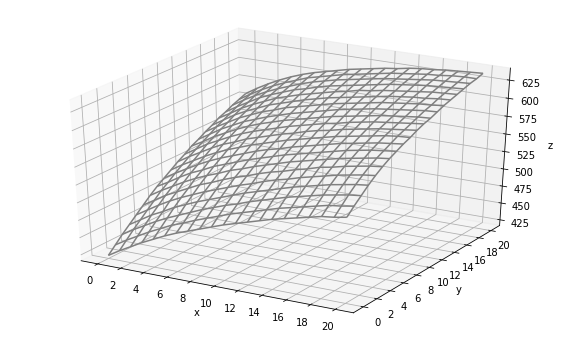

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = range(0, 21)
y = range(0, 21)

X, Y = np.meshgrid(x, y)
Z = value[X, Y]
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='gray')
ax.set_xticks(range(0, 21, 2))
ax.set_yticks(range(0, 21, 2))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');